## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Finishing Up](#conclusions)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Check version of modules which will be used in this project
# https://unix.stackexchange.com/questions/47918/how-to-grep-a-specific-line-and-the-first-line-of-a-file
# https://www.setouchino.cloud/blogs/108
# https://stackoverflow.com/questions/61325817/differences-between-matplotlib-and-matplotlib-base
!conda list | awk 'NR <= 3 || /matplotlib/ || /numpy/ || /pandas/ || /patsy/ || /statsmodels/'

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
matplotlib                3.1.3                    py37_0    conda-forge
matplotlib-base           3.1.3            py37h250f245_0    conda-forge
matplotlib-inline         0.1.3              pyhd8ed1ab_0    conda-forge
numpy                     1.21.2           py37h31617e3_0    conda-forge
pandas                    1.3.3            py37he8f5f7f_0    conda-forge
patsy                     0.5.2              pyhd8ed1ab_0    conda-forge
statsmodels               0.13.0           py37hb1e94ed_0    conda-forge


In [2]:
# Check version of Jupyter components
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.28.0
ipykernel        : 5.1.4
ipywidgets       : 7.6.3
jupyter_client   : 7.0.6
jupyter_core     : 4.8.1
jupyter_server   : 1.11.1
jupyterlab       : 3.2.0
nbclient         : 0.5.4
nbconvert        : 6.0.7
nbformat         : 5.1.3
notebook         : 6.3.0
qtconsole        : not installed
traitlets        : 5.1.0


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df.query('converted == 1').shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
n_mismatch_1 = df.query('landing_page == "new_page" & group != "treatment"').shape[0] # 1928
n_mismatch_2 = df.query('landing_page == "old_page" & group == "treatment"').shape[0] # 1965
print(n_mismatch_1 + n_mismatch_2)

3893


f. Do any of the rows have missing values?

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 64.3 MB


There is no missing value found in the DataFrame.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.drop(df.query('landing_page == "new_page" & group != "treatment"').index).drop(df.query('landing_page == "old_page" & group == "treatment"').index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.groupby(['user_id']).size().reset_index().sort_values(by=0, ascending=False).head(1)

,user_id,0
131712,773192,2


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated(subset=['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(df2[df2.duplicated(subset=['user_id'], keep=False)].index[0], inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.query('converted == 1').shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('group == "control" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('group == "treatment" & converted == 1').shape[0] / df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probability that an individual received the new page is approximately 0.5, indicating a user has a fair chance to receive both versions of webpage. However, the observed conversion rate of the treatment group is lower than the control group, which means it may be unprofitable to implement the new page. Considering the essence of the A/B test run by the website, it is recommended to check if we can reach a similar conclusion when applying inferential statistics to perform analysis, since the initial conclusion relies on descriptive statistics only.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.query('converted == 1').shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.query('converted == 1').shape[0] / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.0016636613481874202

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

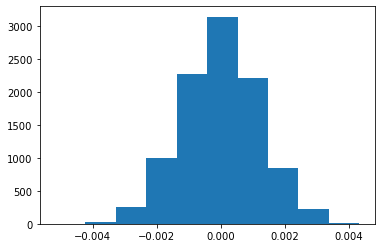

In [28]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
p_new_actual = df2.query('group == "treatment" & converted == 1').shape[0] / df2.query('group == "treatment"').shape[0]
p_old_actual = df2.query('group == "control" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]

(p_diffs > (p_new_actual - p_old_actual)).mean()

0.9042

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value we calculated in part **j** is called the p-value. It could be regarded as an application of conditional probability, because it is the probability of observing the statistic of some outcomes we hoped to see *if the null hypothesis is true*. If the p-value is close to 1, it suggests that the probability of the prior condition (the null hypothesis) to be true would be significant. And certainly the underlying message of the p-value would be reversed if its value is close to 0.

When setting up a hypothesis test, the standard practice is to compare the p-value to the type I error threshold ($α$) to assess which hypothesis we choose to keep/reject. Since the p-value we calculated is close to 1, this implies the null hypothesis we defined earlier

$$H_0: p_{new} - p_{old} \leq 0$$

has a good chance to hold true. As a result, we fail to reject the null hypothesis, and reach the same conclusion in Part I of this report: it is unprofitable to implement the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
# https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/
from statsmodels.stats.proportion import proportions_ztest

count = convert_new + convert_old
nobs = n_new + n_old
value = convert_old / n_old

stat, pval = proportions_ztest(count, nobs, value, alternative='larger')

In [32]:
# https://www.simplypsychology.org/z-score.html
# http://www.comfsm.fm/~dleeling/statistics/s63/zscore.html
print(stat) # z-score
print(pval) # p-value

-1.3110866168458604
0.9050857491354043


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score implies the spread of the data we feed to proportions_ztest() function is within about 1.311 standard deviations of the mean. The negative sign indicates data is *below* the mean. And the p-value here bears the same meaning as the one we computed in part **j.** Since the computed p-value in this part is also close to 1, the findings in part **k** remain unchanged.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should perform a logistic regression because the response variable, **converted**, is categorical by nature.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1

# Create dummy variables
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.drop('control', axis=1, inplace=True)
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
import statsmodels.api as sm

In [35]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
#results.summary()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-11-11 08:47 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [37]:
# When users receive the new landing page, we expect 0.985 times as like to perform conversion than the old landing page
# In other words, it is not encouraging to implement the new landing page
np.exp(-0.0150)

0.9851119396030626

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Remember that a logistic regression model is the same as a linear one, except we are predicting the *log odds* instead of the *response variable* ***y*** itself. See [here](https://courses.lumenlearning.com/boundless-statistics/chapter/multiple-regression/#:~:text=Null%20Hypothesis-,The%20main%20null%20hypothesis%20of%20a%20multiple%20regression%20is%20that,you%20would%20expect%20by%20chance.) and [here](https://www.statology.org/null-hypothesis-for-linear-regression/) for more information regarding the null hypothesis for a linear regression model.

The null and alternative hypotheses associated with a linear regression model (ŷ = β0 + β1x) can be described as:

$$H_0: \text{There is no relationship between the variable x and variable y.}$$

$$H_1: \text{There is a relationship between the variable x and variable y.}$$

Or, we can denote these hypotheses by using coefficient of an independent variable:

$$H_0: β1 = 0$$

$$H_1: β1 \neq 0$$

Because the [p-value](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients) associated with **ab_page**, 0.1899, is greater than 0.05, we fail to reject the null hypothesis, and reach the conclusion that there is no statistically significant relationship between **ab_page** and conversion rate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

A simple regression model has limitation that it can only be used to fit to datasets with a single response variable and a single explanatory variable. For datasets with multiple variables, we need a [multiple regression model](https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e) to fit the data. Most of the real-world problems usually arise from complicated phenomena which have multi-factors inside them, making it inevitable to introduce multiple variables to a regression model.

But adding more terms into a regression model will cause some unwanted effects. Among them, one we need to pay attention to is the situation when some of the explanatory variables are [highly correlated](https://en.wikipedia.org/wiki/Multicollinearity), which may cause the regression model become unreliable; and there is another one that may render the model become [useless](https://en.wikipedia.org/wiki/Overfitting) if we add too many terms into a regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
# Create dummy variables
df2 = pd.merge(df2, pd.read_csv('countries.csv'), how='inner', on='user_id')
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.drop('country', axis=1, inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,1


In [39]:
log_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US']])
results2 = log_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-11-11 08:47 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [40]:
# When users come from UK or US, we expect 1.052 times or 1.042 times respectively as like to perform conversion than 
# users come from CA, holding all else constant
np.exp(0.0506), np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

Because the p-value of associated with dummy variables **UK** and **US**, 0.0745 and 0.1295 respectively, is greater than 0.05, there is no statistically significant relationship between country and conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
# Create interaction terms
df2['ab_page_UK'] = df2['ab_page'] * df2['UK']
df2['ab_page_US'] = df2['ab_page'] * df2['US']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,1,0,0


In [42]:
log_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
results3 = log_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-11-11 08:47 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [43]:
# When users come from UK or US land at the new page, we expect 1.081 times or 1.048 times respectively as like to perform conversion than 
# users come from CA land at the new page, holding all else constant
np.exp(0.0783), np.exp(0.0469)

(1.0814470441230692, 1.048017202119183)

The new model looks strange since the p-values of variables **UK** and **US** increased greatly. We will try to compute VIFs for all variables in the model to check if newly added interaction terms caused multicollinearity problem.

In [44]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get y and X dataframes based on this regression
y, X = dmatrices('converted ~ ab_page + UK + US + ab_page_UK + ab_page_US', df2, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

display(vif)

,VIF Factor,features
0,40.370103,Intercept
1,20.042669,ab_page
2,9.052871,UK
3,9.065123,US
4,10.469097,ab_page_UK
5,19.555056,ab_page_US


The VIF of **ab_page_US** is almost twice as **ab_page_UK**. We will exclude **ab_page_US** from the dataset and refit the model again.

In [45]:
log_mod4 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK']])
results4 = log_mod4.fit()
results4.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.4204
Date:               2021-11-11 08:48 BIC:              212834.3187
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.15568    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0257    0.0268  -75.5180  0.0000  -2.0783  -1.9731
ab_page       -0.0236    0.0132   -1.7853  0.0742  -0.0495   0.0023
UK             0.0335    0.0313    1.0697  0.2848  -0.0279   0.0948
US             0.0407    0.0269    1.5151  0.1298  -0.0120   0.0934
ab_page_UK     0.0344    0.0264    1.3057  0.1917  -0.0172   0.0861
==================================================================

"""

In [46]:
# When users come from UK land at the new page, we expect 1.035 times as like to perform conversion than 
# users come from CA land at the new page, holding all else constant
np.exp(0.0344)

1.0349985233486143

And this time, the VIFs of all variables in the model looked okay.

In [47]:
y, X = dmatrices('converted ~ ab_page + UK + US + ab_page_UK', df2, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

display(vif)

,VIF Factor,features
0,21.392892,Intercept
1,1.332239,ab_page
2,5.500529,UK
3,4.502226,US
4,2.325243,ab_page_UK


After adding an interaction term into the model, the p-values of all explanatory variables are still greater than 0.05. Since we cannot find any statistically significant relationship between independent variables (*groups/landing pages*, *countries*, *interaction terms*) and dependent variable (*conversion rate*), we would suggest the company to **keep the old page** of their e-commerce website, and end the experiment on the new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

Although we have already come to a conclusion for the completed A/B test, there are a few points that may be helpful if the company plans to set up additional A/B tests in the future.

* We cannot distinguish new users from existing users, making it difficult for us to determine if [novelty effect](https://medium.com/geekculture/the-novelty-effect-an-important-factor-to-be-aware-of-when-running-a-b-tests-c080856130d3) and [change aversion](https://www.teamcroco.com/how-our-natural-aversion-to-change-can-impact-a-b-test-results/) impacted the test results. It would be better if we split the data generated by different groups of users and save them as separate files.
* We do not know the actual cost of the new landing page implementation. Depending on the scale of the cost, it may be reasonable to suggest the company to extend the period of the A/B test, thus reducing the biases we stated earlier caused by existing users.

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
# Create a soft copy of this notebook in HTML format
from subprocess import call
call(['python', '-m', 'nbconvert', '--to', 'html', 'Analyze_ab_test_results_notebook.ipynb'])

0